<b>LINEAR REGRESSION ASSIGNMENT<b>

1. Read in the happiness dataset on the student site

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('happiness_index.csv')


2. View the dataframe and plot the different features against the target using a scatter plot. Which features look like they have a linear relationship with the target? Are there any features that need to be preprocessed before they can be used in the model?

In [3]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
data= data.drop('Overall rank',axis=1)
data =data.drop('Country or region', axis=1)

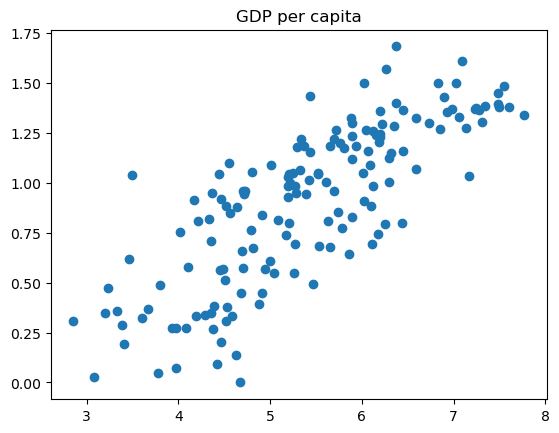

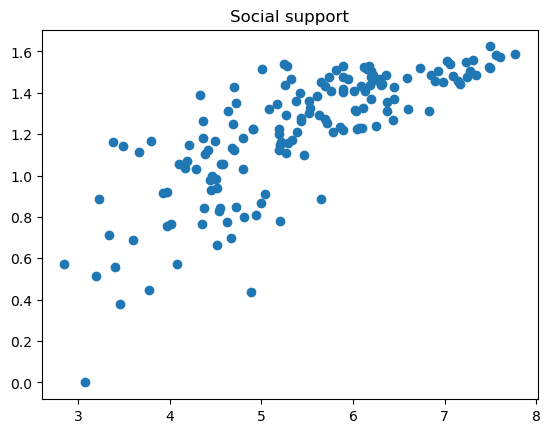

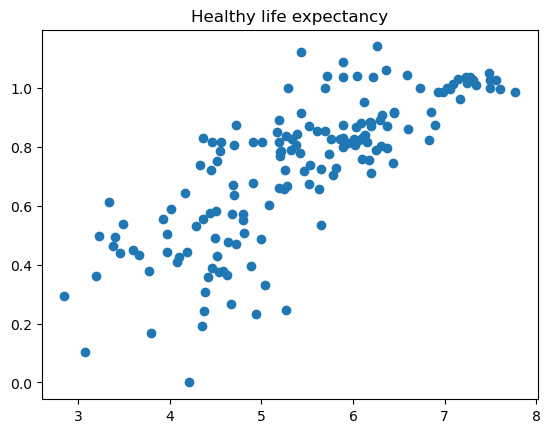

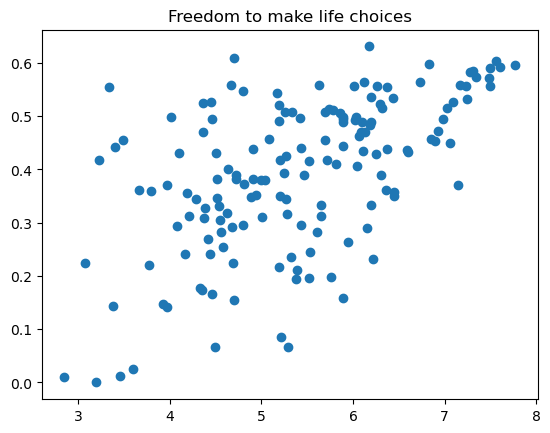

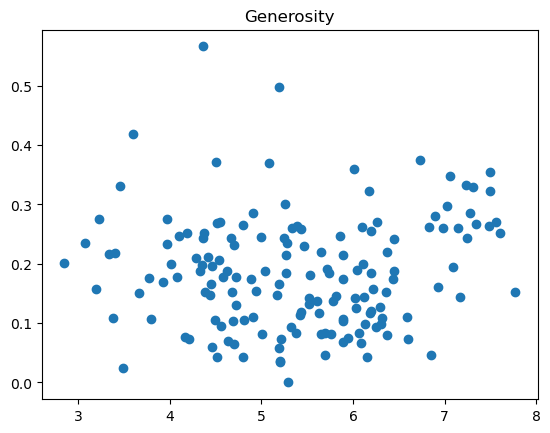

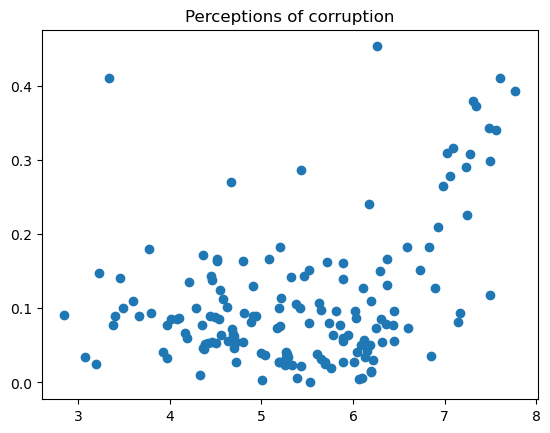

In [5]:
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for f in features:
    plt.scatter(data['Score'], data[f])
    plt.title(f)
    plt.show()

The following features have a linear regression: GDP per capita, Social support, Healthy life expectancy.
The features that needed preprocessing were dropped before we plotted the scatter plots.

3. Choose which features you would like to use in your model and assign to a variable.

In [6]:
updated_features = ['GDP per capita', 'Social support', 'Healthy life expectancy']

4.  Split your dataset into features and targets and then into train and test sets.

In [7]:
X= data[updated_features]
y= data['Score']

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

5. Instantiate the linear regression model

In [9]:
lr = LinearRegression()

6. Fit the linear regression model

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

7. Make predictions on your test using the linear regression model you just fitted.


In [11]:
predictions = lr.predict(X_test)
predictions

array([5.81068656, 4.40181178, 4.74873083, 5.94064742, 4.28451356,
       6.13793326, 5.43319641, 6.15553662, 5.53346232, 5.72918057,
       6.06925644, 4.34803477, 4.04490159, 6.68756966, 6.17399286,
       6.63718372, 4.23851644, 6.52364941, 4.63119735, 6.52693938,
       4.75600999, 6.30464678, 6.0326729 , 6.72273655, 3.43497033,
       4.52316268, 6.5156366 , 6.39833905, 4.35302497, 5.67103326,
       3.77804381, 5.95625332, 4.76547739, 3.89233943, 6.51456224,
       5.74911371, 6.49540579, 5.52399801, 5.8971083 ])

8.What are the coefficents of this model?  What is the intercept?

In [12]:
lr.coef_

array([0.65978008, 1.26549079, 1.59027078])

In [13]:
lr.intercept_

2.1254651870659496

9. Get the r2 score for your model. Does it seem like your model is performing well? 
    No, it does not seem like the model is perfoming well.

In [14]:
lr.score(X_test, y_test)

0.7688477034503087

10. Graph the residual. Do you see any patterns?  The positive and negative residuals appear to be almost mirror images of eachother.  That would make me think that I don't need to adjust my line in a specific direction, rather, that there are data points that are more spread out and the line is pretty much in the middle.

Text(0, 0.5, 'Residual')

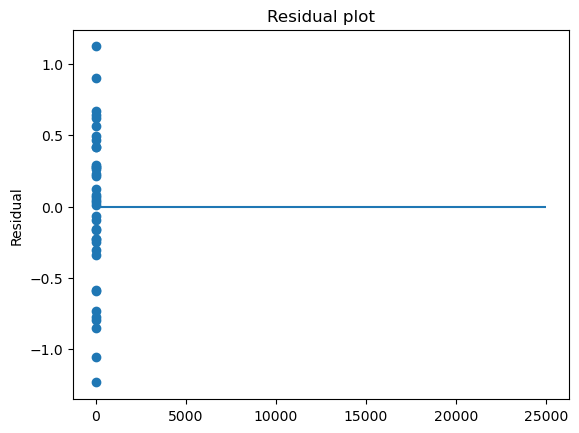

In [15]:
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin = 0, xmax = 25000) 
plt.title('Residual plot')
plt.ylabel('Residual')



11. BONUS: next steps - What can you do to improve your model? Try one additional step to improve your model and get the score to see if the model actually improved. 

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
predictions = lr2.predict(X_test_scaled)
lr2.score(X_test_scaled, y_test)

0.7688477034503087